# Chapter 2
##Applied

**8. This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US.**

A) Load the dataset

In [ ]:
import pandas as pd

In [ ]:
url= "https://raw.githubusercontent.com/tdpetrou/Machine-Learning-Books-With-Python/master/Introduction%20to%20Statistical%20Learning/data/college.csv"
df=pd.read_csv(url)

B) Examine dataset

In [ ]:
df.head() #Note: if you want to examine the whole dataset, use print(df.to_string())

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


C) 
*   Produce numerical summary











In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000




*   Produce a scatterplot matrix of
the first ten columns or variables of the data.



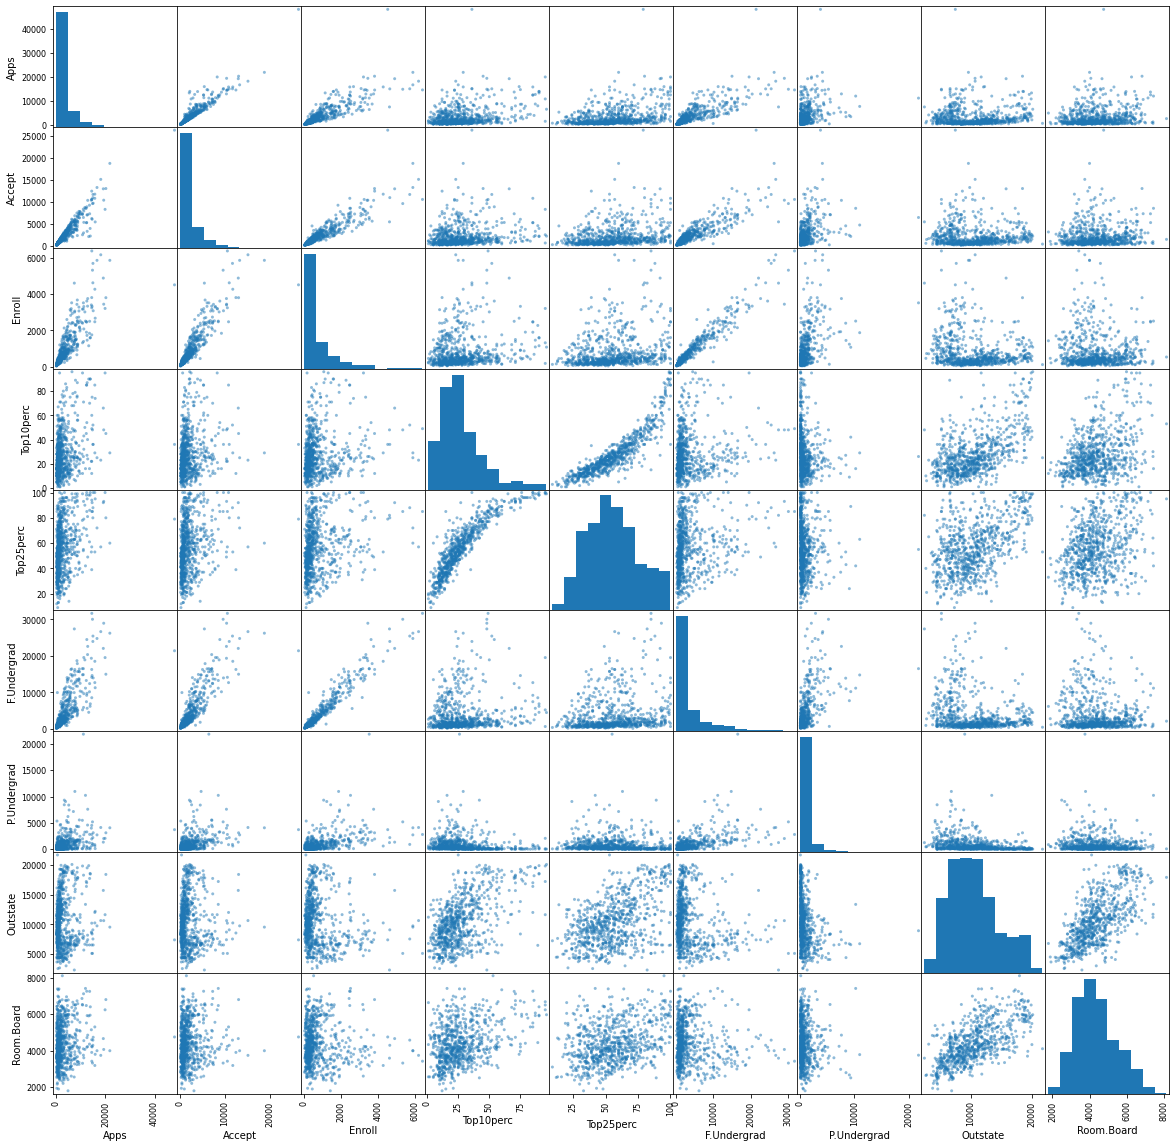

In [ ]:
df_cols=[]
for idx, col in enumerate(df.columns):

  if idx==10: break
  else: df_cols.append(col) #Get 10 first columns in df

pd.plotting.scatter_matrix(df[df_cols], figsize=(20,20)); #plot cols, it skips categorical data



*   Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.


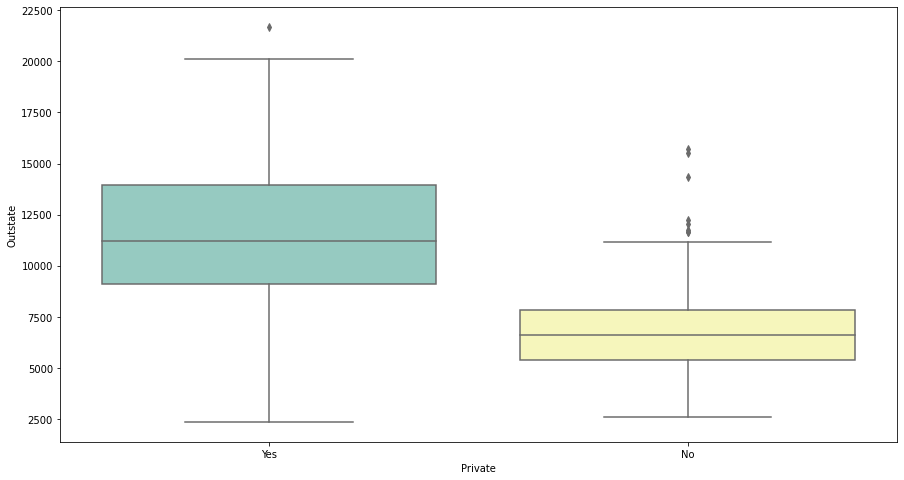

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Private", y="Outstate",
                 data=df,palette="Set3")

*   Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.

*   See how many elite universities
there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.




In [ ]:
import numpy as np

#Create a list with one line for loop which sets "yes" if it exceedes 50 and "no" otherwise

Elite=["Yes" if df.Top10perc[i]>50 else "No" for i in range(0,len(df))]
df['Elite']=Elite

In [ ]:
df.value_counts('Elite')

Elite
No     699
Yes     78
dtype: int64

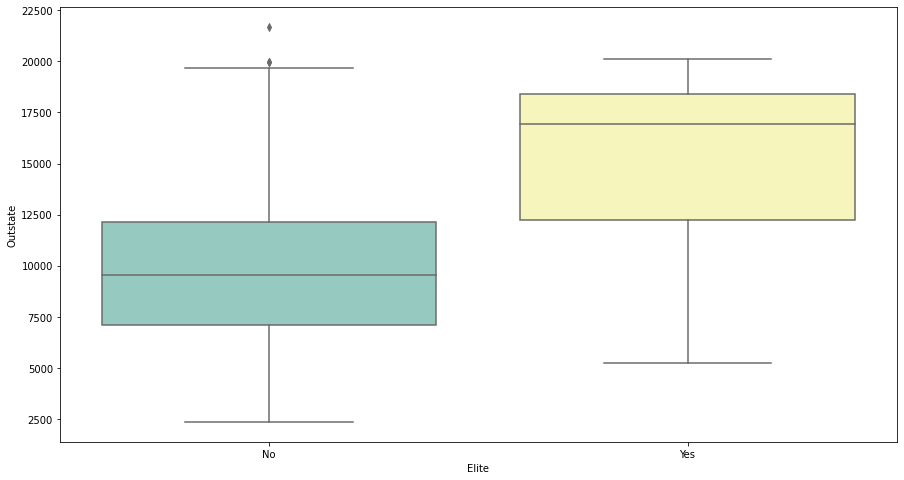

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Elite", y="Outstate",
                 data=df,palette='Set3')

*   Produce some histograms with
differing numbers of bins for a few of the quantitative variables.


17 quantitative columns in dataset


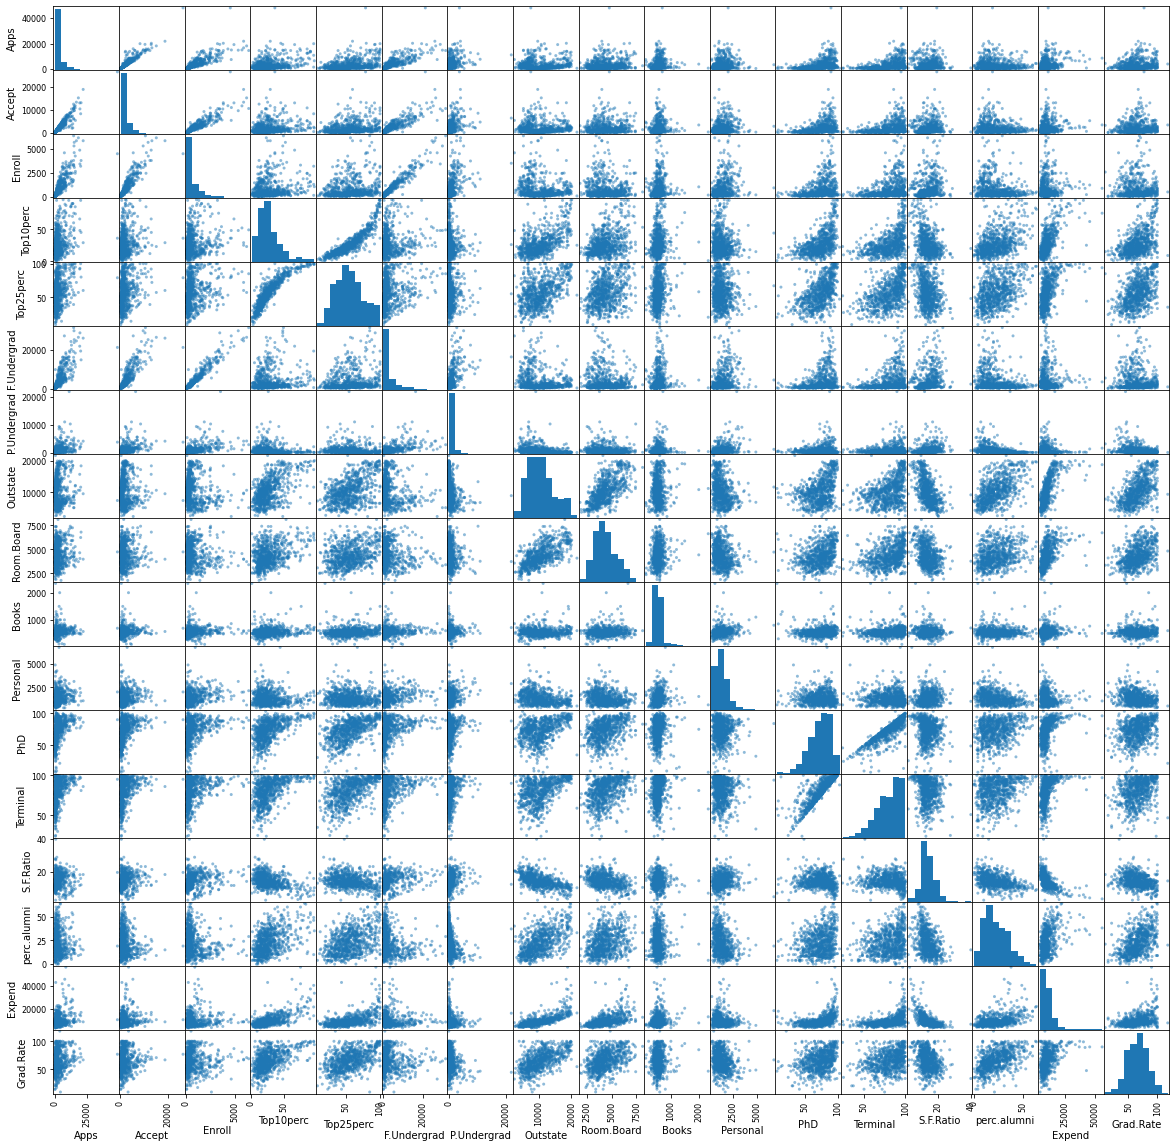

In [ ]:
df_q=df.select_dtypes(include=[np.number]) #get quantitative cols from df and save it in new df of quantitative data

print(f'{len(df_q.columns)} quantitative columns in dataset')

pd.plotting.scatter_matrix(df_q[[i for i in df_q.columns]], figsize=(20,20));

*   Continue exploring the data, and provide a brief summary
of what you discover. **Up to the user to explore more**



**9. This exercise involves the Auto data set studied in the lab.**

A) Which of the predictors are quantitative, and which are qualitative?

In [ ]:
url_auto="https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
df=pd.read_csv(url_auto) #Load it first

df.head() #cylinders, origin and name are qualitative

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


B & C) What is the range of each quantitative predictor? What is the mean and standard deviation of each quantitative
predictor?

In [ ]:
def stats(df):
  
  for idx,col in enumerate(df):
    col_values=df.iloc[:,idx].values
    print(col)
    print(f"Min -> {np.min(col_values)}")
    print(f"Max -> {np.max(col_values)}")
    print(f"Mean -> {round(np.mean(col_values))}")
    print(f"Std -> {round(np.std(col_values))} \n")

In [ ]:
import numpy as np

df_q=df.iloc[:,[0,2,3,4,5,6]] #quantitative cols

stats(df_q)


mpg
Min -> 9.0
Max -> 46.6
Mean -> 23
Std -> 8 

displacement
Min -> 68.0
Max -> 455.0
Mean -> 194
Std -> 105 

horsepower
Min -> 46
Max -> 230
Mean -> 104
Std -> 38 

weight
Min -> 1613
Max -> 5140
Mean -> 2978
Std -> 848 

acceleration
Min -> 8.0
Max -> 24.8
Mean -> 16
Std -> 3 

year
Min -> 70
Max -> 82
Mean -> 76
Std -> 4 



D) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?



In [ ]:
idx=list(range(10,86))

subset_df_q=df_q.drop(df_q.index[[idx]]) #create a subset of quantitative data of df with removing observsations

stats(subset_df_q)

mpg
Min -> 11.0
Max -> 46.6
Mean -> 24
Std -> 8 

displacement
Min -> 68.0
Max -> 455.0
Mean -> 188
Std -> 100 

horsepower
Min -> 46
Max -> 230
Mean -> 101
Std -> 36 

weight
Min -> 1649
Max -> 4997
Mean -> 2937
Std -> 811 

acceleration
Min -> 8.5
Max -> 24.8
Mean -> 16
Std -> 3 

year
Min -> 70
Max -> 82
Mean -> 77
Std -> 3 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


E & F) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings. 

Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer. 

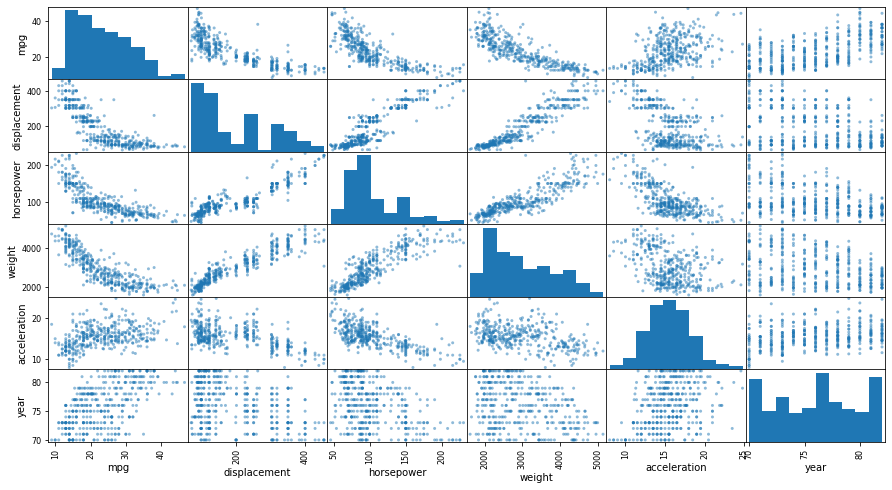

In [ ]:
pd.plotting.scatter_matrix(df_q[[i for i in df_q.columns]], figsize=(15,8));

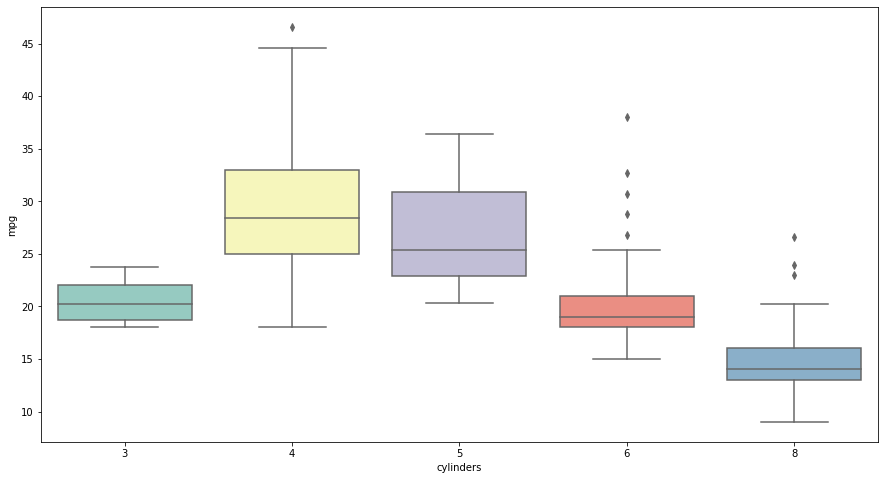

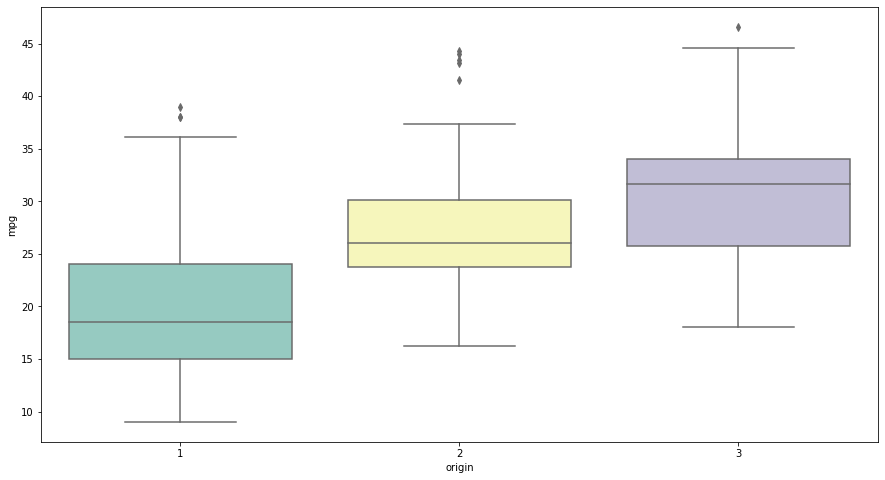

In [ ]:
plt.figure(figsize=(15,8))
ax_1 = sns.boxplot(x="cylinders", y="mpg",
                 data=df,palette='Set3')

plt.figure(figsize=(15,8))
ax_2 = sns.boxplot(x='origin', y="mpg",
                 data=df,palette='Set3')

**Year produced, cylinder type and origin seem to have an impact**

**10. This exercise involves the Boston housing data set.**

A) To begin, load in the Boston data set. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [ ]:
url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df=pd.read_csv(url)

#Move crim (dependent var) to last column
df=df[[col for col in df if col not in ['crim']] 
       + ['crim']] 

df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.00632
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.02731
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.02729
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.03237
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.06905


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zn       506 non-null    float64
 1   indus    506 non-null    float64
 2   chas     506 non-null    int64  
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
 13  crim     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


B) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

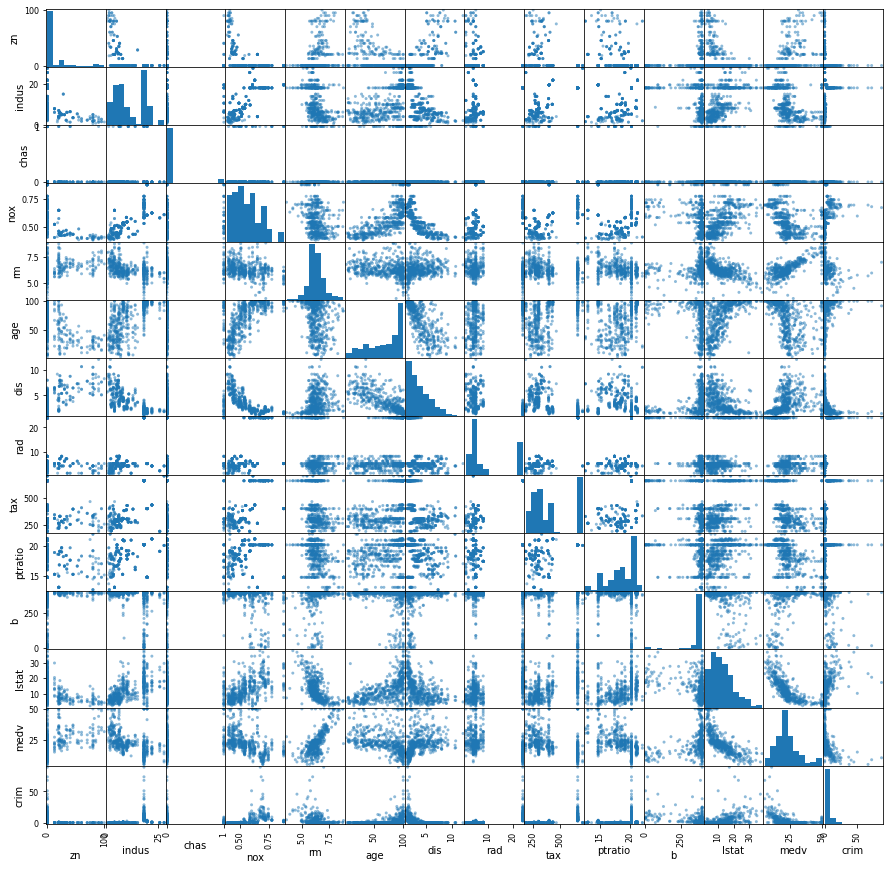

In [ ]:
pd.plotting.scatter_matrix(df[[i for i in df.columns]], figsize=(15,15));

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

Predictors which have a correlation with crime rate are: Index(['indus', 'nox', 'age', 'rad', 'tax', 'lstat', 'crim'], dtype='object')


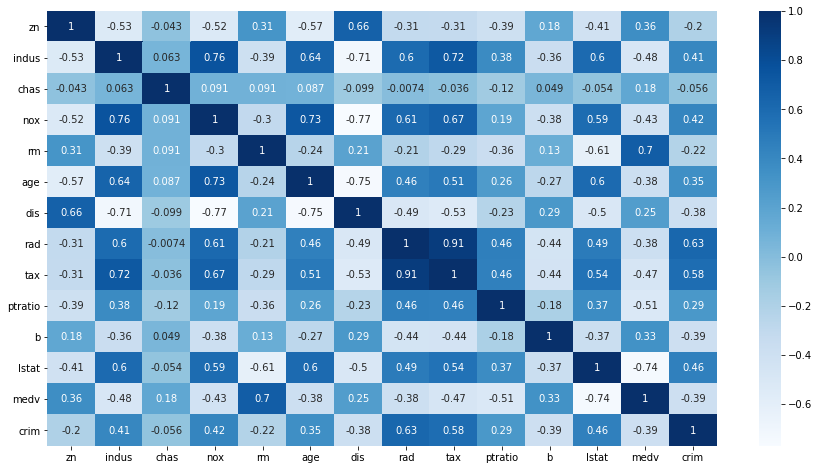

In [ ]:
plt.figure(figsize=(15,8))

corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

top_features = corr.index[abs(corr["crim"]>0.3)] #Extract predictors which have a correlation of >0.3 from correlation matrix
print(f"Predictors which have a correlation with crime rate are: {top_features}")

(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

16 suburbs have high crime rates


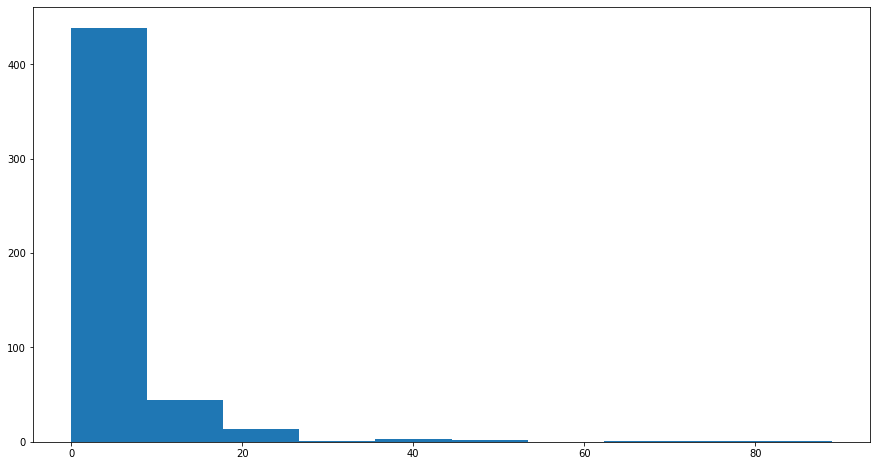

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['crim'])
print(f"{round(np.percentile(df['crim'],95))} suburbs have high crime rates")

666 suburbs have high tax rates. There is a high and low peak


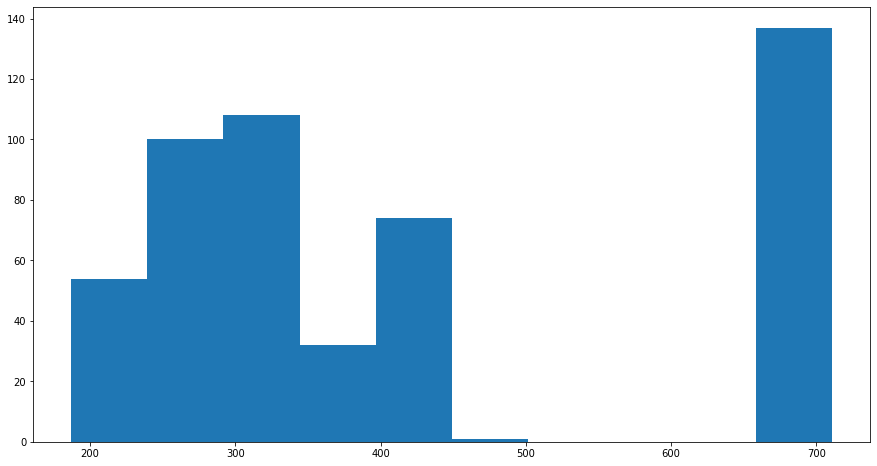

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['tax'])
print(f"{round(np.percentile(df['tax'],95))} suburbs have high tax rates. There is a high and low peak")

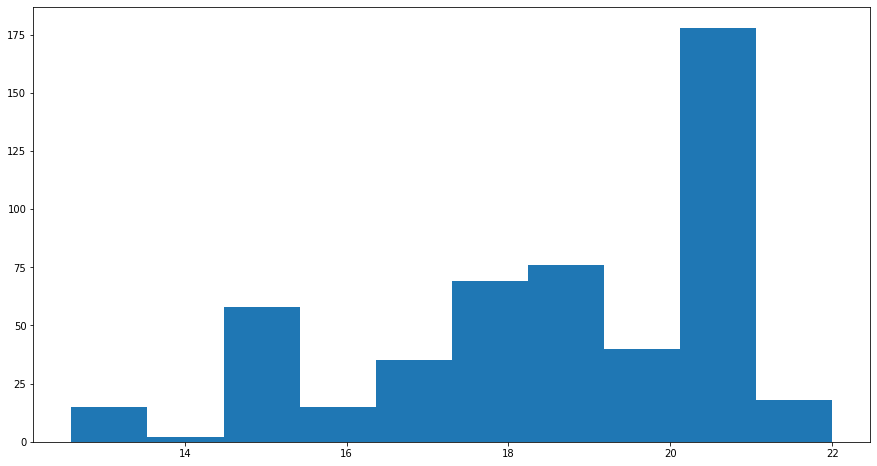

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['ptratio']);

(e) How many of the suburbs in this data set bound the Charles
river?

In [ ]:
df.value_counts('chas') #35

chas
0    471
1     35
dtype: int64

(f) What is the median pupil-teacher ratio among the towns in this
data set?

In [ ]:
print(f"Median pupil-teacher ratio is: {np.median(df.loc[:,'ptratio'])}")

Median pupil-teacher ratio is: 19.05
